## SIS Problem

## Variables

* $g_S = \text{Growth term of the Susceptibles}$  

* $g_I = \text{Growth term of the Infected}$  

* $c_S = \text{Competition term of the Susceptibles}$  

* $c_I = \text{Competition term of the Infected}$  

* $N = \text{the total, fixed size of the population}$

* $I = \text{number of infected, initially}$

* $S = \text{number of susceptibles}$

* $\gamma = \text{Recovery Rate} = \cfrac{1}{\text{Infection Duration}}$

* $\beta = \text{Infection Rate}$

## Assumptions

* $N = 10000; I = 120; S = 9880$

* $\gamma = \cfrac{1}{6}; \beta = 0.85$

* $g_S = -\cfrac{\beta S I}{N}$  

* $g_I = \cfrac{\beta S I}{N}$  

* $c_S, c_I = \gamma I$  

* $\frac{dS}{dt} = -\cfrac{\beta S I}{N} + \gamma I = -\beta I \Big(1 - \frac{I}{N}\Big) + \gamma I$

* $\frac{dI}{dt} = \cfrac{\beta S I}{N} - \gamma I = \beta I \Big(1 - \frac{I}{N}\Big) - \gamma I$

* $S, I \geq 0$

### Packages

In [1]:
import numpy as np
import sympy as sp
from sympy.solvers import solve
from matplotlib import pyplot as plt
import math as m

### Variables

In [2]:
I = sp.symbols('I')
gS, gI, cS, cI = -0.85*I*(1 - I/10000), 0.85*I*(1 - I/10000), (1/6)*I, (1/6)*I
dSdt, dIdt = gS + cS, gI - cI
sp.init_printing()

### Functions

In [3]:
def susceptibles(infected):
    """Rate of Change (differential) for susceptibles"""
    return (-0.85*infected*(1 - infected/10000)) + (1/6)*infected


def infected(infected):
    """Rate of Change (differential) for infected"""
    return 0.85*infected*(1 - infected/10000) - (1/6)*infected


def reproductiveNumber(beta, gamma):
    """basic reproductive number, when (\beta)/(\gamma) > 1, the disease
    will spread and approach the second steady state; otherwise, it 
    will eventually reach the disease-free state."""
    return beta/gamma

def criticalThreshold(r0):
    """ critical vaccination threshold, which is equal to 1-(1/ R0)"""
    return  (1-(1/r0))

### Equilibrium Points

In [4]:
solve([dSdt, dIdt], I)

### Plot

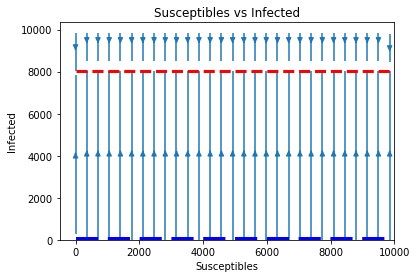

In [5]:
x, y = np.linspace(0, 10000), np.linspace(0, 10000)
X, Y = np.meshgrid(x, y)
U, V = 0*susceptibles(Y), infected(Y)
fig, ax1 = plt.subplots()
ax1.streamplot(X, Y, U, V)
ax1.plot([0, 10000], [solve([dSdt, dIdt], I)[1][0], solve([dSdt, dIdt], I)[1][0]], 
         c= 'r', ls= '--', lw= 3)

ax1.plot([0, 10000], [solve([dSdt, dIdt], I)[0][0], solve([dSdt, dIdt], I)[0][0]], 
         c= 'b', ls= '--', lw= 6)
ax1.set(xlabel= 'Susceptibles', ylabel= 'Infected', 
        title= 'Susceptibles vs Infected');

### Reproductive Number

**To calculate this value, we'll use the following formula:**

* $R_0 = {\beta}{\zeta}$ 
* $\gamma = \text{Recovery Rate} = \cfrac{1}{\text{Infection Duration}}$
* $\beta = \text{Infection Rate}$

In [6]:
beta, gamma = 0.85, 1/6
r0 = reproductiveNumber(beta, gamma)
r0

### Critical Threshold

In [9]:
criticalThreshold(r0)